In [1]:
#Implementation of stochastic and batch grandient descent in python

In [2]:
'''We will use very simple home prices data set to implement batch and stochastic gradient descent in python. 
Batch gradient descent uses *all* training samples in forward pass to 
calculate cumulitive error and then we adjust weights using derivaties. 
In stochastic GD, we randomly pick *one* training sample, perform forward pass, 
compute the error and immidiately adjust weights. 
So the key difference here is that to adjust weights batch GD will use *all* training 
samples where as stochastic GD will use one randomly picked training sample'''

'We will use very simple home prices data set to implement batch and stochastic gradient descent in python. \nBatch gradient descent uses *all* training samples in forward pass to \ncalculate cumulitive error and then we adjust weights using derivaties. \nIn stochastic GD, we randomly pick *one* training sample, perform forward pass, \ncompute the error and immidiately adjust weights. \nSo the key difference here is that to adjust weights batch GD will use *all* training \nsamples where as stochastic GD will use one randomly picked training sample'

In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [4]:
# Load the dataset in pandas dataframe

In [5]:
df = pd.read_csv("homeprices.csv")
df.sample(5)

,area,bedrooms,price
3,1521,3,75.0
11,2785,4,140.0
6,2732,4,135.0
2,1440,3,62.0
15,1175,2,42.0


In [6]:
# Preprocessing/Scaling: Since our columns are on different scale it is important to do scaling.

In [7]:
'''
Why do we reshape y but not X?
Scalers expect 2D data → shape: (rows, columns)
X = df.drop('price', axis=1) ie, (area, bedrooms)
so, sx.fit_transform(X) this works directly:

y is 1D (problem!)
y = df['price']
So we reshape it, values.reshape(df.shape[0], 1) converts a 1D price array into a 2D column so scikit-learn can scale it.


fit learns from the data, and transform applies a transformation using what was learned. 
In the case of MinMaxScaler, it converts data points to values between 0 and 1.
'''

"\nWhy do we reshape y but not X?\nScalers expect 2D data → shape: (rows, columns)\nX = df.drop('price', axis=1) ie, (area, bedrooms)\nso, sx.fit_transform(X) this works directly:\n\ny is 1D (problem!)\ny = df['price']\nSo we reshape it, values.reshape(df.shape[0], 1) converts a 1D price array into a 2D column so scikit-learn can scale it.\n\n\nfit learns from the data, and transform applies a transformation using what was learned. \nIn the case of MinMaxScaler, it converts data points to values between 0 and 1.\n"

In [8]:
#scaling the dataset
from sklearn import preprocessing
sx = preprocessing.MinMaxScaler()
sy = preprocessing.MinMaxScaler()

# drop price for X df
scaled_X = sx.fit_transform(df.drop('price',axis='columns'))

# price(target) as y df
scaled_y = sy.fit_transform(df['price'].values.reshape(df.shape[0],1))

scaled_X

array([[0.08827586, 0.25      ],
       [0.62068966, 0.75      ],
       [0.22068966, 0.5       ],
       [0.24862069, 0.5       ],
       [0.13793103, 0.25      ],
       [0.12758621, 0.25      ],
       [0.6662069 , 0.75      ],
       [0.86206897, 0.75      ],
       [0.17586207, 0.5       ],
       [1.        , 1.        ],
       [0.34482759, 0.5       ],
       [0.68448276, 0.75      ],
       [0.06896552, 0.25      ],
       [0.10344828, 0.25      ],
       [0.5       , 0.5       ],
       [0.12931034, 0.25      ],
       [0.13103448, 0.5       ],
       [0.25517241, 0.5       ],
       [0.67931034, 0.5       ],
       [0.        , 0.        ]])

In [9]:
scaled_y

array([[0.05237037],
       [0.65185185],
       [0.22222222],
       [0.31851852],
       [0.14074074],
       [0.04444444],
       [0.76296296],
       [0.91111111],
       [0.13333333],
       [1.        ],
       [0.37037037],
       [0.8       ],
       [0.04444444],
       [0.05925926],
       [0.51111111],
       [0.07407407],
       [0.11851852],
       [0.20740741],
       [0.51851852],
       [0.        ]])

In [10]:
#We should convert target column (i.e. price) into one dimensional array. 
# It has become 2D due to scaling that we did above but now we should change to 1D

In [11]:
scaled_y.reshape(20,)

array([0.05237037, 0.65185185, 0.22222222, 0.31851852, 0.14074074,
       0.04444444, 0.76296296, 0.91111111, 0.13333333, 1.        ,
       0.37037037, 0.8       , 0.04444444, 0.05925926, 0.51111111,
       0.07407407, 0.11851852, 0.20740741, 0.51851852, 0.        ])

In [12]:
#Gradient descent allows you to find weights (w1,w2,w3) and bias in following linear equation for housing price prediction

In [13]:
#Now is the time to implement batch gradient descent.

In [14]:
w = np.ones(shape=(2))

In [15]:
def batch_gradient_descent(X, y_true, epochs, learning_rate = 0.01):
    # .shape gives(rows, columns) numbers
    number_of_features = X.shape[1] # returns number of columns which is 2 features in X
    # numpy array with 1 row and columns equal to number of features. In 
    # our case number_of_features = 2 (area, bedroom)
    
    #initializing w1 and w2 for 2 features as 1, 1
    w = np.ones(shape=(number_of_features)) 
    b = 0 # bias as 0
    total_samples = X.shape[0] # number of rows in X, all data points
    
    cost_list = []
    epoch_list = []
    
    for i in range(epochs):        
        y_predicted = np.dot(w, X.T) + b # y_predicted is our linear eqn y = x1w1 +x2w2 + b , where x1, x2 are area and bedroom

        #calculate derivatives for weights
        w_grad = -(2/total_samples)*(X.T.dot(y_true-y_predicted))
        #calculate derivatives for bias
        b_grad = -(2/total_samples)*np.sum(y_true-y_predicted)
        
        #updating weights
        w = w - learning_rate * w_grad
        #updating bias
        b = b - learning_rate * b_grad
        
        #sum of all loss (errors) and taking average
        cost = np.mean(np.square(y_true-y_predicted)) # MSE (Mean Squared Error)
        
        
        #record the value of cost function and epoch at every 10th iteration to plot a graph later.
        if i%10==0:
            cost_list.append(cost)
            epoch_list.append(i)
        
    return w, b, cost, cost_list, epoch_list

w, b, cost, cost_list, epoch_list = batch_gradient_descent(scaled_X,scaled_y.reshape(scaled_y.shape[0],),500) # passing scaled X and y. epoch is 500
w, b, cost

(array([0.70712464, 0.67456527]),
 np.float64(-0.23034857438407427),
 np.float64(0.0068641890429808105))

In [16]:
'''
Check price equation above. In that equation we were trying to find values of w1,w2 and bias. Here we got these values for each of them,
w1 = 0.66469087
w2 = 0.60541671
bias = -0.17792104056392882
'''

'\nCheck price equation above. In that equation we were trying to find values of w1,w2 and bias. Here we got these values for each of them,\nw1 = 0.66469087\nw2 = 0.60541671\nbias = -0.17792104056392882\n'

In [17]:
# Now plot epoch vs cost graph to see how cost reduces as number of epoch increases

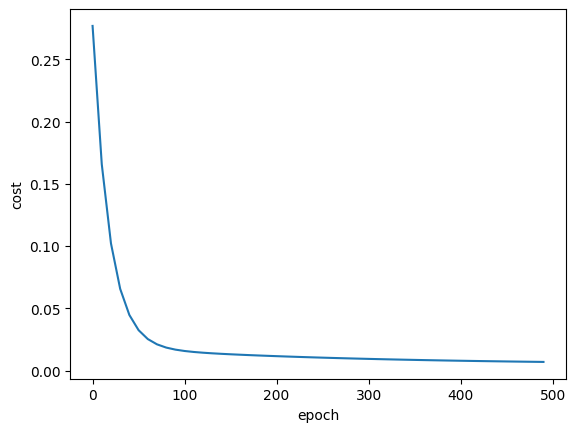

In [18]:
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list,cost_list)

In [19]:
# Lets do some predictions now. 

In [20]:
# we take scaled obj of x, then transform into value between 0 and 1.
sx.transform([[2400, 4]]) #(area, bedroom)

c:\Users\fasil\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


array([[0.55172414, 0.75      ]])

In [21]:
# returns min , middle, max values , returns 2d array
sy.inverse_transform([[1, 0.5, 0]])

array([[167. ,  99.5,  32. ]])

In [22]:
# returns one values, 1 d array when we use [0][0]
sy.inverse_transform([[1, 0.5, 0]])[0][0]

np.float64(166.99999999999997)

In [23]:
def predict(area,bedrooms,w,b):
    scaled_X = sx.transform([[area, bedrooms]])[0] # 2D array, we want first element
    # here w1 = w[0] , w2 = w[1], w3 = w[2] and bias is b
    # equation for price is w1*area + w2*bedrooms + w3*age + bias
    # scaled_X[0] is area
    # scaled_X[1] is bedrooms
    # scaled_X[2] is age
    scaled_price = w[0] * scaled_X[0] + w[1] * scaled_X[1] + b
    # once we get price prediction we need to to rescal it back to original value
    # also since it returns 2D array, to get single value we need to do value[0][0]
    return sy.inverse_transform([[scaled_price]])[0][0] # returns one single value which is predicted

predict(2600,4,w,b)

c:\Users\fasil\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


np.float64(128.45484403267596)

In [24]:
predict(1000,2,w,b)

c:\Users\fasil\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


np.float64(30.253094462442355)

In [25]:
predict(1500,3,w,b)

c:\Users\fasil\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


np.float64(69.47860785714694)

In [26]:
# (2) Stochastic Gradient Descent Implementation

In [27]:
#Stochastic GD will use randomly picked single training sample to 
# calculate error and using this error we backpropage to adjust weights

In [28]:
import random


def SGD(X, y_true, epochs, learning_rate = 0.01):
 
    number_of_features = X.shape[1]
    # numpy array with 1 row and columns equal to number of features. In 
    # our case number_of_features = 3 (area, bedroom and age)
    w = np.ones(shape=(number_of_features)) 
    b = 0
    total_samples = X.shape[0]
    
    cost_list = []
    epoch_list = []
    
    for i in range(epochs):    
        random_index = random.randint(0,total_samples-1) # random index from total samples
        sample_x = X[random_index]
        sample_y = y_true[random_index]
        
        y_predicted = np.dot(w, sample_x.T) + b
    
        w_grad = -(2/total_samples)*(sample_x.T.dot(sample_y-y_predicted))
        b_grad = -(2/total_samples)*(sample_y-y_predicted)
        
        w = w - learning_rate * w_grad
        b = b - learning_rate * b_grad
        
        cost = np.square(sample_y-y_predicted)
        
        if i%100==0: # at every 100th iteration record the cost and epoch value
            cost_list.append(cost)
            epoch_list.append(i)
        
    return w, b, cost, cost_list, epoch_list

w_sgd, b_sgd, cost_sgd, cost_list_sgd, epoch_list_sgd = SGD(scaled_X,scaled_y.reshape(scaled_y.shape[0],),10000)
w_sgd, b_sgd, cost_sgd

(array([0.70929498, 0.67669198]),
 np.float64(-0.23185763358192762),
 np.float64(0.000277248780835088))

In [29]:
#Compare this with weights and bias that we got using gradient descent. They both of quite similar.

In [30]:
w , b 

(array([0.70712464, 0.67456527]), np.float64(-0.23034857438407427))

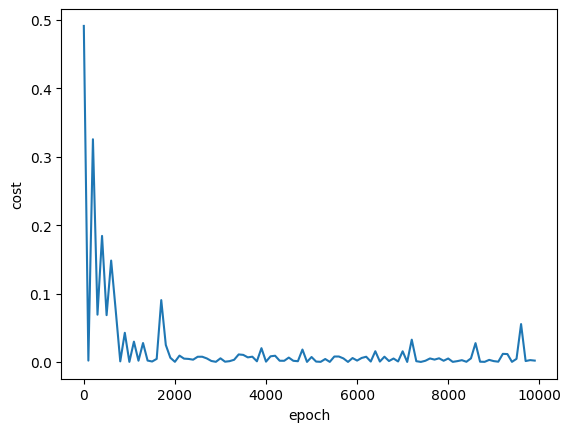

In [31]:
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list_sgd,cost_list_sgd)

In [32]:
predict(2600,4,w_sgd, b_sgd) 

c:\Users\fasil\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


np.float64(128.64831029806032)

In [33]:
predict(1000,2,w_sgd, b_sgd)

c:\Users\fasil\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


np.float64(30.141354648590855)

In [34]:
predict(1500,3,w_sgd, b_sgd)

c:\Users\fasil\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


np.float64(69.48916115203376)